In [206]:
import pandas as pd
import numpy as np


In [207]:


df=pd.read_csv('../data/suicide_rate.csv')

In [208]:
df

,country,year,sex,age,suicides_no,population,suicides/100k pop,country-year,HDI for year,gdp_for_year ($),gdp_per_capita ($),generation
0,Albania,1987,male,15-24 years,21,312900,6.71,Albania1987,NaN,"2,156,624,900",796,Generation X
1,Albania,1987,male,35-54 years,16,308000,5.19,Albania1987,NaN,"2,156,624,900",796,Silent
2,Albania,1987,female,15-24 years,14,289700,4.83,Albania1987,NaN,"2,156,624,900",796,Generation X
3,Albania,1987,male,75+ years,1,21800,4.59,Albania1987,NaN,"2,156,624,900",796,G.I. Generation
4,Albania,1987,male,25-34 years,9,274300,3.28,Albania1987,NaN,"2,156,624,900",796,Boomers
...,...,...,...,...,...,...,...,...,...,...,...,...
27815,Uzbekistan,2014,female,35-54 years,107,3620833,2.96,Uzbekistan2014,0.675,"63,067,077,179",2309,Generation X
27816,Uzbekistan,2014,female,75+ years,9,348465,2.58,Uzbekistan2014,0.675,"63,067,077,179",2309,Silent
27817,Uzbekistan,2014,male,5-14 years,60,2762158,2.17,Uzbekistan2014,0.675,"63,067,077,179",2309,Generation Z
27818,Uzbekistan,2014,female,5-14 years,44,2631600,1.67,Uzbekistan2014,0.675,"63,067,077,179",2309,Generation Z


In [209]:
df.columns=df.columns.str.replace(' ','')

In [210]:
df.dtypes

country               object
year                   int64
sex                   object
age                   object
suicides_no            int64
population             int64
suicides/100kpop     float64
country-year          object
HDIforyear           float64
gdp_for_year($)       object
gdp_per_capita($)      int64
generation            object
dtype: object

In [211]:
# year to date time
#df['year']=pd.to_datetime(df['year'], format='%Y')


In [212]:
# gdp_for_year ($) to int
df['gdp_for_year($)']=pd.to_numeric(df['gdp_for_year($)'].str.replace(',',''))

In [213]:
df.dtypes

country               object
year                   int64
sex                   object
age                   object
suicides_no            int64
population             int64
suicides/100kpop     float64
country-year          object
HDIforyear           float64
gdp_for_year($)        int64
gdp_per_capita($)      int64
generation            object
dtype: object

In [214]:
country_year_sex=df.groupby(['year','country', 'sex'],as_index=False).agg({'suicides_no':sum, 'population':sum,
                                           'HDIforyear':np.average,
                                           'gdp_for_year($)':np.average,
                                           'gdp_per_capita($)':np.average }).copy()

In [215]:
country_year_sex

,year,country,sex,suicides_no,population,HDIforyear,gdp_for_year($),gdp_per_capita($)
0,1985,Antigua and Barbuda,female,0,32292,NaN,240923926,3850
1,1985,Antigua and Barbuda,male,0,30282,NaN,240923926,3850
2,1985,Argentina,female,538,13690900,0.694,88416668900,3264
3,1985,Argentina,male,1450,13399900,0.694,88416668900,3264
4,1985,Australia,female,425,7313800,NaN,180190994861,12374
...,...,...,...,...,...,...,...,...
4637,2016,Romania,male,1643,8054969,NaN,187805922349,10020
4638,2016,Sweden,female,348,4084416,NaN,514459972806,55594
4639,2016,Sweden,male,782,4041436,NaN,514459972806,55594
4640,2016,Thailand,female,842,27496685,NaN,411755164833,6713


In [216]:
country_year_sex.dtypes

year                   int64
country               object
sex                   object
suicides_no            int64
population             int64
HDIforyear           float64
gdp_for_year($)        int64
gdp_per_capita($)      int64
dtype: object

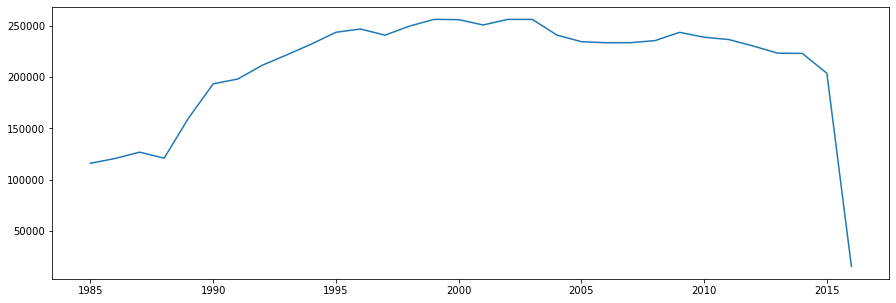

In [217]:
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.api as sm


fig, ax1 = plt.subplots(figsize=(15,5))
plt.plot(country_year_sex.groupby(['year']).agg({'suicides_no':sum}))


In [218]:
uf=pd.read_csv('../data/female_unemployment.csv',header=2)
um=pd.read_csv('../data/male_unemployment.csv',header=2)
pd.set_option('display.max_columns', 40)


In [219]:
uf.columns

Index(['Country Name', 'Country Code', 'Indicator Name', 'Indicator Code',
       '1960', '1961', '1962', '1963', '1964', '1965', '1966', '1967', '1968',
       '1969', '1970', '1971', '1972', '1973', '1974', '1975', '1976', '1977',
       '1978', '1979', '1980', '1981', '1982', '1983', '1984', '1985', '1986',
       '1987', '1988', '1989', '1990', '1991', '1992', '1993', '1994', '1995',
       '1996', '1997', '1998', '1999', '2000', '2001', '2002', '2003', '2004',
       '2005', '2006', '2007', '2008', '2009', '2010', '2011', '2012', '2013',
       '2014', '2015', '2016', '2017', '2018', '2019', 'Unnamed: 64'],
      dtype='object')

In [220]:
uf=uf.drop(['Country Code', 'Indicator Name', 'Indicator Code', '1960', '1961',
       '1962', '1963', '1964', '1965', '1966', '1967', '1968', '1969', '1970',
       '1971', '1972', '1973', '1974', '1975', '1976', '1977', '1978', '1979',
       '1980', '1981', '1982', '1983', '1984', '2017', '2018', '2019', 'Unnamed: 64'],axis=1)

um=um.drop(['Country Code', 'Indicator Name', 'Indicator Code', '1960', '1961',
       '1962', '1963', '1964', '1965', '1966', '1967', '1968', '1969', '1970',
       '1971', '1972', '1973', '1974', '1975', '1976', '1977', '1978', '1979',
       '1980', '1981', '1982', '1983', '1984', '2017', '2018', '2019', 'Unnamed: 64'],axis=1)

In [221]:
uf=pd.melt(uf,id_vars=['Country Name'], value_vars=['1985', '1986',
       '1987', '1988', '1989', '1990', '1991', '1992', '1993', '1994', '1995',
       '1996', '1997', '1998', '1999', '2000', '2001', '2002', '2003', '2004',
       '2005', '2006', '2007', '2008', '2009', '2010', '2011', '2012', '2013',
       '2014', '2015', '2016'],
       var_name='year')

um=pd.melt(um,id_vars=['Country Name'], value_vars=['1985', '1986',
       '1987', '1988', '1989', '1990', '1991', '1992', '1993', '1994', '1995',
       '1996', '1997', '1998', '1999', '2000', '2001', '2002', '2003', '2004',
       '2005', '2006', '2007', '2008', '2009', '2010', '2011', '2012', '2013',
       '2014', '2015', '2016'],
       var_name='year')

In [222]:
uf['year']=uf['year'].astype(int)
uf.columns=uf.columns.str.replace('Country Name','country')

um['year']=um['year'].astype(int)
um.columns=um.columns.str.replace('Country Name','country')

In [223]:
#female
uf.insert(2, "sex", 'female')
#male
um.insert(2, "sex", 'male')

In [224]:
um

,country,year,sex,value
0,Aruba,1985,male,NaN
1,Afghanistan,1985,male,NaN
2,Angola,1985,male,11.5000
3,Albania,1985,male,NaN
4,Andorra,1985,male,NaN
...,...,...,...,...
8443,Kosovo,2016,male,26.1500
8444,"Yemen, Rep.",2016,male,NaN
8445,South Africa,2016,male,24.5348
8446,Zambia,2016,male,NaN


In [225]:
country_year_sex=pd.merge(country_year_sex, uf,  how='left', left_on=['country','year','sex'], 
                          right_on = ['country','year','sex'],suffixes=('', ''))

In [226]:
country_year_sex

,year,country,sex,suicides_no,population,HDIforyear,gdp_for_year($),gdp_per_capita($),value
0,1985,Antigua and Barbuda,female,0,32292,NaN,240923926,3850,NaN
1,1985,Antigua and Barbuda,male,0,30282,NaN,240923926,3850,NaN
2,1985,Argentina,female,538,13690900,0.694,88416668900,3264,NaN
3,1985,Argentina,male,1450,13399900,0.694,88416668900,3264,NaN
4,1985,Australia,female,425,7313800,NaN,180190994861,12374,8.7628
...,...,...,...,...,...,...,...,...,...
4637,2016,Romania,male,1643,8054969,NaN,187805922349,10020,NaN
4638,2016,Sweden,female,348,4084416,NaN,514459972806,55594,6.5859
4639,2016,Sweden,male,782,4041436,NaN,514459972806,55594,NaN
4640,2016,Thailand,female,842,27496685,NaN,411755164833,6713,0.7143


In [227]:
country_year_sex=pd.merge(country_year_sex, um,  how='left', left_on=['country','year','sex'], 
                          right_on = ['country','year','sex'])

In [228]:
country_year_sex

,year,country,sex,suicides_no,population,HDIforyear,gdp_for_year($),gdp_per_capita($),value_x,value_y
0,1985,Antigua and Barbuda,female,0,32292,NaN,240923926,3850,NaN,NaN
1,1985,Antigua and Barbuda,male,0,30282,NaN,240923926,3850,NaN,NaN
2,1985,Argentina,female,538,13690900,0.694,88416668900,3264,NaN,NaN
3,1985,Argentina,male,1450,13399900,0.694,88416668900,3264,NaN,NaN
4,1985,Australia,female,425,7313800,NaN,180190994861,12374,8.7628,NaN
...,...,...,...,...,...,...,...,...,...,...
4637,2016,Romania,male,1643,8054969,NaN,187805922349,10020,NaN,6.5875
4638,2016,Sweden,female,348,4084416,NaN,514459972806,55594,6.5859,NaN
4639,2016,Sweden,male,782,4041436,NaN,514459972806,55594,NaN,7.3573
4640,2016,Thailand,female,842,27496685,NaN,411755164833,6713,0.7143,NaN


In [229]:
country_year_sex['unemployment']=country_year_sex['value_x'].fillna(country_year_sex['value_y'])

In [230]:
country_year_sex=country_year_sex.drop(['value_x', 'value_y'],axis=1).copy()

In [231]:
dmf=pd.read_csv('../data/prevalence-of-depression-males-vs-females.csv',header=0)

In [232]:
dmf

,Entity,Code,Year,Total population (Gapminder,HYDE & UN),Continent,Prevalence - Depressive disorders - Sex: Male - Age: Age-standardized (Percent),Prevalence - Depressive disorders - Sex: Female - Age: Age-standardized (Percent)
0,Abkhazia,OWID_ABK,2015,NaN,Asia,NaN,NaN,NaN
1,Afghanistan,AFG,1800,3280000.0,NaN,NaN,NaN,NaN
2,Afghanistan,AFG,1801,3280000.0,NaN,NaN,NaN,NaN
3,Afghanistan,AFG,1802,3280000.0,NaN,NaN,NaN,NaN
4,Afghanistan,AFG,1803,3280000.0,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...
47853,Zimbabwe,ZWE,2016,14030000.0,NaN,2.799308,3.479071,NaN
47854,Zimbabwe,ZWE,2017,14237000.0,NaN,2.812022,3.500860,NaN
47855,Zimbabwe,ZWE,2018,14439000.0,NaN,NaN,NaN,NaN
47856,Zimbabwe,ZWE,2019,14645000.0,NaN,NaN,NaN,NaN


In [233]:
dmf=dmf[['Year','Entity','Continent','Prevalence - Depressive disorders - Sex: Male - Age: Age-standardized (Percent)']]
dmf.columns=dmf.columns.str.replace(' ','')
dmf.columns

Index(['Year', 'Entity', 'Continent',
       'Prevalence-Depressivedisorders-Sex:Male-Age:Age-standardized(Percent)'],
      dtype='object')

In [234]:
dmf=dmf.rename({'Year':'year', 'Entity':'country', 'Continent':'male',
       'Prevalence-Depressivedisorders-Sex:Male-Age:Age-standardized(Percent)':'female'}, axis='columns')

In [235]:
dmf=pd.melt(dmf,id_vars=['year','country'], value_vars=['male', 'female'],var_name='sex')

In [236]:
country_year_sex=pd.merge(country_year_sex, dmf,  how='left', left_on=['country','year','sex'], 
                          right_on = ['country','year','sex'])

country_year_sex=country_year_sex.rename({'value':'depression_rate'},axis='columns')

In [242]:
country_year_sex

,year,country,sex,suicides_no,population,HDIforyear,gdp_for_year($),gdp_per_capita($),unemployment,depression_rate
0,1985,Antigua and Barbuda,female,0,32292,NaN,240923926,3850,NaN,NaN
1,1985,Antigua and Barbuda,male,0,30282,NaN,240923926,3850,NaN,NaN
2,1985,Argentina,female,538,13690900,0.694,88416668900,3264,NaN,NaN
3,1985,Argentina,male,1450,13399900,0.694,88416668900,3264,NaN,NaN
4,1985,Australia,female,425,7313800,NaN,180190994861,12374,8.7628,NaN
...,...,...,...,...,...,...,...,...,...,...
4637,2016,Romania,male,1643,8054969,NaN,187805922349,10020,6.5875,1.984293
4638,2016,Sweden,female,348,4084416,NaN,514459972806,55594,6.5859,5.842276
4639,2016,Sweden,male,782,4041436,NaN,514459972806,55594,7.3573,3.147301
4640,2016,Thailand,female,842,27496685,NaN,411755164833,6713,0.7143,3.560438


In [246]:
finaltable=country_year_sex.assign(suicides_per_100K=country_year_sex['suicides_no']/(country_year_sex['population']/100000))

In [249]:


finaltable.to_csv('suicide_unemployment_depresion.csv')